<a href="https://colab.research.google.com/github/swap-mitra/deep-learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Swapnil Mitra

# Imports

In [1]:
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Getting the Data

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

228818944/228813984 [==============================] - 5s 0us/step


# Data Exploration

In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15761264350_4caaf080f6_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/6653567281_768a1fd160.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/9164900485_605aa12da8.jpg')]

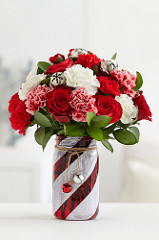

In [6]:
PIL.Image.open(str(roses[1]))

In [7]:
flower_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

flower_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [8]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 320, 3)

In [9]:
X,y = [], []

for flower_name, images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [10]:
X = np.array(X)
y = np.array(y)

### Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
len(X_train)

2752

### Preprocessing: Scale images

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Building the Model

In [14]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 58s 666ms/step - loss: 1.4938 - accuracy: 0.3779
Epoch 2/30
86/86 [==============================] - 57s 663ms/step - loss: 1.0484 - accuracy: 0.5908
Epoch 3/30
86/86 [==============================] - 57s 660ms/step - loss: 0.8356 - accuracy: 0.6922
Epoch 4/30
86/86 [==============================] - 58s 669ms/step - loss: 0.6300 - accuracy: 0.7787
Epoch 5/30
86/86 [==============================] - 57s 667ms/step - loss: 0.3661 - accuracy: 0.8790
Epoch 6/30
86/86 [==============================] - 57s 668ms/step - loss: 0.1899 - accuracy: 0.9433
Epoch 7/30
86/86 [==============================] - 57s 668ms/step - loss: 0.1131 - accuracy: 0.9658
Epoch 8/30
86/86 [==============================] - 57s 667ms/step - loss: 0.0962 - accuracy: 0.9724
Epoch 9/30
86/86 [==============================] - 57s 666ms/step - loss: 0.0613 - accuracy: 0.9840
Epoch 10/30
86/86 [==============================] - 58s 673ms/step - loss: 0.0336 - accura

In [15]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 208ms/step - loss: 3.4434 - accuracy: 0.6209


[3.4433610439300537, 0.6209150552749634]

In [16]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -5.4559836 ,  17.822678  ,  -6.9340997 , -15.953486  ,
         11.732887  ],
       [  0.03462037,  -0.28334594,  -7.49852   ,   2.417983  ,
         12.5228    ],
       [ 14.270054  ,  -3.1214352 ,   8.6173935 , -20.17587   ,
         -4.7642837 ],
       ...,
       [-10.800623  , -12.258939  ,  -0.5510447 ,  20.63007   ,
          1.3431094 ],
       [ -1.4383188 ,  16.802835  ,   1.640947  , -16.013678  ,
          3.0880282 ],
       [ -4.240038  , -15.664284  ,  -5.592641  ,  25.483948  ,
          3.2520168 ]], dtype=float32)

In [17]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomZoom(0.3),
])

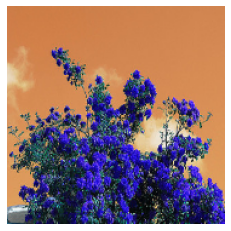

In [19]:
plt.axis('off')
plt.imshow(X[0])

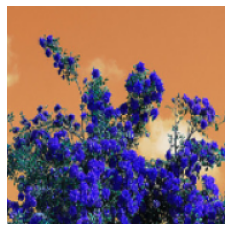

In [18]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

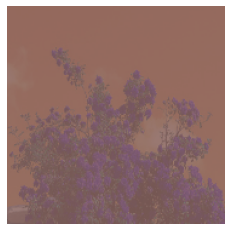

In [20]:
data_aug1 = keras.Sequential([
                             layers.experimental.preprocessing.RandomContrast(0.9),
])

plt.axis('off')
plt.imshow(data_aug1(X)[0].numpy().astype("uint8"))

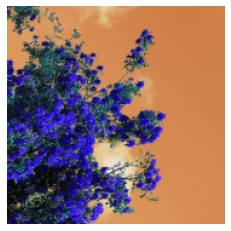

In [22]:
data_aug2 = keras.Sequential([
                             layers.experimental.preprocessing.RandomRotation(0.3),
])

plt.axis('off')
plt.imshow(data_aug2(X)[0].numpy().astype("uint8"))

##Improve Test Accuracy Using Data Augmentation

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Train the model using data augmentation and a drop out layer

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 71s 810ms/step - loss: 1.2879 - accuracy: 0.4531
Epoch 2/30
86/86 [==============================] - 70s 810ms/step - loss: 1.0394 - accuracy: 0.5865
Epoch 3/30
86/86 [==============================] - 69s 806ms/step - loss: 0.9174 - accuracy: 0.6374
Epoch 4/30
86/86 [==============================] - 69s 803ms/step - loss: 0.8487 - accuracy: 0.6722
Epoch 5/30
86/86 [==============================] - 70s 810ms/step - loss: 0.7871 - accuracy: 0.6973
Epoch 6/30
86/86 [==============================] - 72s 840ms/step - loss: 0.7245 - accuracy: 0.7148
Epoch 7/30
86/86 [==============================] - 69s 804ms/step - loss: 0.7096 - accuracy: 0.7293
Epoch 8/30
86/86 [==============================] - 69s 806ms/step - loss: 0.6689 - accuracy: 0.7420
Epoch 9/30
86/86 [==============================] - 70s 809ms/step - loss: 0.6417 - accuracy: 0.7525
Epoch 10/30
86/86 [==============================] - 70s 809ms/step - loss: 0.6262 - accura

In [27]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 222ms/step - loss: 0.8452 - accuracy: 0.7538


[0.8452216982841492, 0.7538126111030579]